In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/MyDrive/Project-X-Lip-Reading


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import imutils
from imutils import face_utils
import dlib
import time

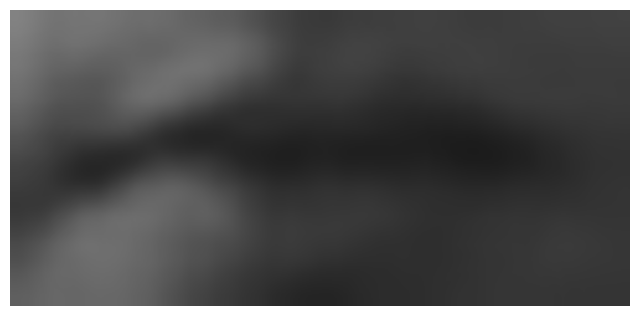

In [4]:
def lips_extractor(img):
    predictor = dlib.shape_predictor('/content/drive/MyDrive/Project-X-Lip-Reading/Data Preprocessing/xml files/shape_predictor_68_face_landmarks.dat')

    image = cv2.imread(img)
    image = imutils.resize(image, width=56)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    bbox = dlib.rectangle(0, 0, gray.shape[1], gray.shape[0])
    face_landmarks = predictor(gray, bbox)
    face_landmarks = face_utils.shape_to_np(face_landmarks)

    for (name,(i,j)) in face_utils.FACIAL_LANDMARKS_IDXS.items():
         if name=='mouth':
            for (x, y) in face_landmarks[i:j]:
                (x, y, w, h) = cv2.boundingRect(np.array([face_landmarks[i:j]]))
                lip_image = image[y - 2:y + h + 2, x - 2:x + w + 2]
                lip_image = imutils.resize(lip_image, width=500, inter=cv2.INTER_CUBIC)

                # Denoising
                # lip_image = cv2.fastNlMeansDenoisingColored(lip_image, None, 10, 10, 7, 21)
                # lip_image = cv2.GaussianBlur(lip_image, (5, 5), 0)
                # lip_image = cv2.bilateralFilter(lip_image, 9, 75, 75)

                lip_image = cv2.cvtColor(lip_image, cv2.COLOR_BGR2GRAY)

    if len(lip_image) == 0:
        print("No lips detected.")
        return None
    else:
        return lip_image

# Test lips extractor
lips_image = lips_extractor('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/dataset/M01/phrases/01/01/color_001.jpg')
if lips_image is None:
    print("Error: No cropped image provided.")
else:
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(lips_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

In [ ]:
# path = '/content/drive/MyDrive/Project-X-Lip-Reading/03'
# for fname in os.listdir(path):
#   if not os.path.isdir(fname):
#       image_path = os.path.join(path, fname)
#       cropped_lip = lips_extractor(image_path)
#   if cropped_lip is not None:
#       cv2.imwrite(image_path, cropped_lip)

In [ ]:
os.getcwd() # print current working directory

'/content/drive/MyDrive/Project-X-Lip-Reading'

In [5]:
# replace the image in dataset with cropped lip image
t1 = time.time()
for f in os.listdir('Dataset/dataset'):
    f_path = os.path.join('Dataset/dataset', f)
    if os.path.isdir(f_path):
        tx1 = time.time()
        for l in os.listdir(f_path):
            l_path = os.path.join(f_path, l)
            if os.path.isdir(l_path):
                for w in os.listdir(l_path):
                    w_path = os.path.join(l_path, w)
                    if os.path.isdir(w_path):
                        for p in os.listdir(w_path):
                            p_path = os.path.join(w_path, p)
                            if os.path.isdir(p_path):
                                for fname in os.listdir(p_path):
                                    if not os.path.isdir(fname):
                                        image_path = os.path.join(p_path, fname)
                                        cropped_lip = lips_extractor(image_path)
                                        if cropped_lip is not None:
                                            cv2.imwrite(image_path, cropped_lip)
        tx2 = time.time()
        print(f'Extracted lips for person {f}. Time taken : {tx2 - tx1} sec')
t2 = time.time()
print(f'Total time taken : {t2 - t1} sec')

Extracted lips for person M01. Time taken : 3850.11123585701 sec
Extracted lips for person M02. Time taken : 4211.388498306274 sec
Extracted lips for person M07. Time taken : 3448.413233280182 sec
Extracted lips for person M04. Time taken : 3983.5821194648743 sec
Extracted lips for person M08. Time taken : 3120.2553339004517 sec
Total time taken : 18613.76988196373 sec
